In [1]:
import obspy
from obspy import read
import matplotlib.pyplot as plt

In [2]:
st = read('ST_01_2020-01-13_Mw_5_80*',debug_headers=True)
print(st)

1 Trace(s) in Stream:
ST.01..BXZ | 2020-01-13T15:15:36.163873Z - 2020-01-13T16:15:26.383873Z | 50.0 Hz, 179512 samples


In [23]:
net = 'TTN'
sta = 'DF01'
loc = '00'
cha = 'BXZ'

BXZ_data=st[0].data
BXZ_times=st[0].times()
#fig = plt.figure(figsize=(16,20))

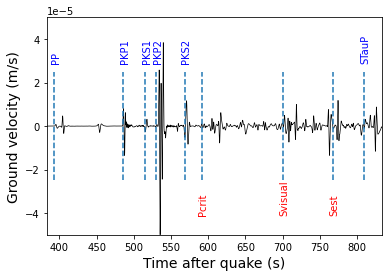

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(BXZ_times,BXZ_data,label='.'.join([net,sta,loc,cha]),color='k',linewidth=0.7)
ax.set_xlim(383.22,833.22)
ax.set_ylim(-0.00005,0.00005)
# ax.legend(loc="upper right")
ax.set_xlabel('Time after quake (s)',fontsize = 14)
ax.set_ylabel('Ground velocity (m/s)', fontsize = 14)

arrivals_taup={'PP':393.22,'PKP1':485.820,'PKS1':515.439,'PKP2':530.396,'PKS2':568.316,'STauP':809.182}
arrivals_est={'Pcrit':591.16,'Svisual':700.83,'Sest':767.828}
for key in arrivals_taup:
    ax.axvline(x=arrivals_taup[key], ymin=0.25, ymax=0.75, ls='--', label=key)
    ax.text(s=key, x=arrivals_taup[key]-5, y=0.00005*0.6, rotation=90, color='b')
for key in arrivals_est:
    ax.axvline(x=arrivals_est[key], ymin=0.25, ymax=0.75, ls='--', label=key)
    ax.text(s=key, x=arrivals_est[key]-5, y=-0.00005*0.8, rotation=90, color='r')
plt.show()

In [94]:
fig.savefig('phasearrivals.png',dpi=1000,format='png')